### Apêndice I - Redes neurais artificiais para engenharia e ciÇencias aplicadas

In [1]:
# Apendice I
import pandas as pd
data = [
    ['01', -0.6508, 0.1097, 4.0009, -1.0000],
    ['02', -1.4492, 0.8896, 4.4005, -1.0000],
    ['03', 2.0850, 0.6876, 12.0710, -1.0000],
    ['04', 0.2626, 1.1476, 7.7985, 1.0000],
    ['05', 0.6418, 1.0234, 7.0427, 1.0000],
    ['06', 0.2569, 0.6730, 8.3265, -1.0000],
    ['07', 1.1155, 0.6043, 7.4446, 1.0000],
    ['08', 0.0914, 0.3399, 7.0677, -1.0000],
    ['09', 0.0121, 0.5256, 4.6316, 1.0000],
    ['10', -0.0429, 0.4660, 5.4323, 1.0000],
    ['11', 0.4340, 0.6870, 8.2287, -1.0000],
    ['12', 0.2735, 1.0287, 7.1934, 1.0000],
    ['13', 0.4839, 0.4851, 7.4850, -1.0000],
    ['14', 0.4089, -0.1267, 5.5019, -1.0000],
    ['15', 1.4391, 0.1614, 8.5843, -1.0000],
    ['16', -0.9115, -0.1973, 2.1962, -1.0000],
    ['17', 0.3654, 1.0475, 7.4858, 1.0000],
    ['18', 0.2144, 0.7515, 7.1699, 1.0000],
    ['19', 0.2013, 1.0014, 6.5489, 1.0000],
    ['20', 0.6483, 0.2183, 5.8991, 1.0000],
    ['21', -0.1147, 0.2242, 7.2435, -1.0000],
    ['22', -0.7970, 0.8795, 3.8762, 1.0000],
    ['23', -1.0625, 0.6366, 2.4707, 1.0000],
    ['24', 0.5307, 0.1285, 5.6883, 1.0000],
    ['25', -1.2200, 0.7777, 1.7252, 1.0000],
    ['26', 0.3957, 0.1076, 5.6623, -1.0000],
    ['27', -0.1013, 0.5989, 7.1812, -1.0000],
    ['28', 2.4482, 0.9455, 11.2095, 1.0000],
    ['29', 2.0149, 0.6192, 10.9263, -1.0000],
    ['30', 0.2012, 0.2611, 5.4631, 1.0000]
]
columns = ['Amostra', 'X1', 'X2', 'X3', 'd']
df = pd.DataFrame(data, columns=columns)
df.head()

,Amostra,X1,X2,X3,d
0,01,-0.6508,0.1097,4.0009,-1.0
1,02,-1.4492,0.8896,4.4005,-1.0
2,03,2.0850,0.6876,12.0710,-1.0
3,04,0.2626,1.1476,7.7985,1.0
4,05,0.6418,1.0234,7.0427,1.0


In [2]:
import numpy as np
x = np.array(df[columns[1:4]])
d = np.array(df[columns[4]])
w = np.random.uniform(0, 1, size=(1, 3))
w0 = -1

In [3]:
def activation(u):
    return np.where(u >= 0, 1, -1)

In [4]:
learn = 0.01
epoch = range(10000)
for i in epoch:
    u = w @ x.T + w0
    y = activation(u)
    if (y != d).any():
        w = w + learn * (d - y) @ x
        w0 = w0 + learn * (d - y).sum()
    else:
        print(f"Converged after {i} epochs")
        print("Final weights:", w)
        print("Final bias:", w0)
        break

Converged after 1570 epochs
Final weights: [[ 8.74588389 14.14755417 -4.0566807 ]]
Final bias: 17.879999999999907


In [5]:
np.array(df[columns[1:4]]).min()

np.float64(-1.4492)

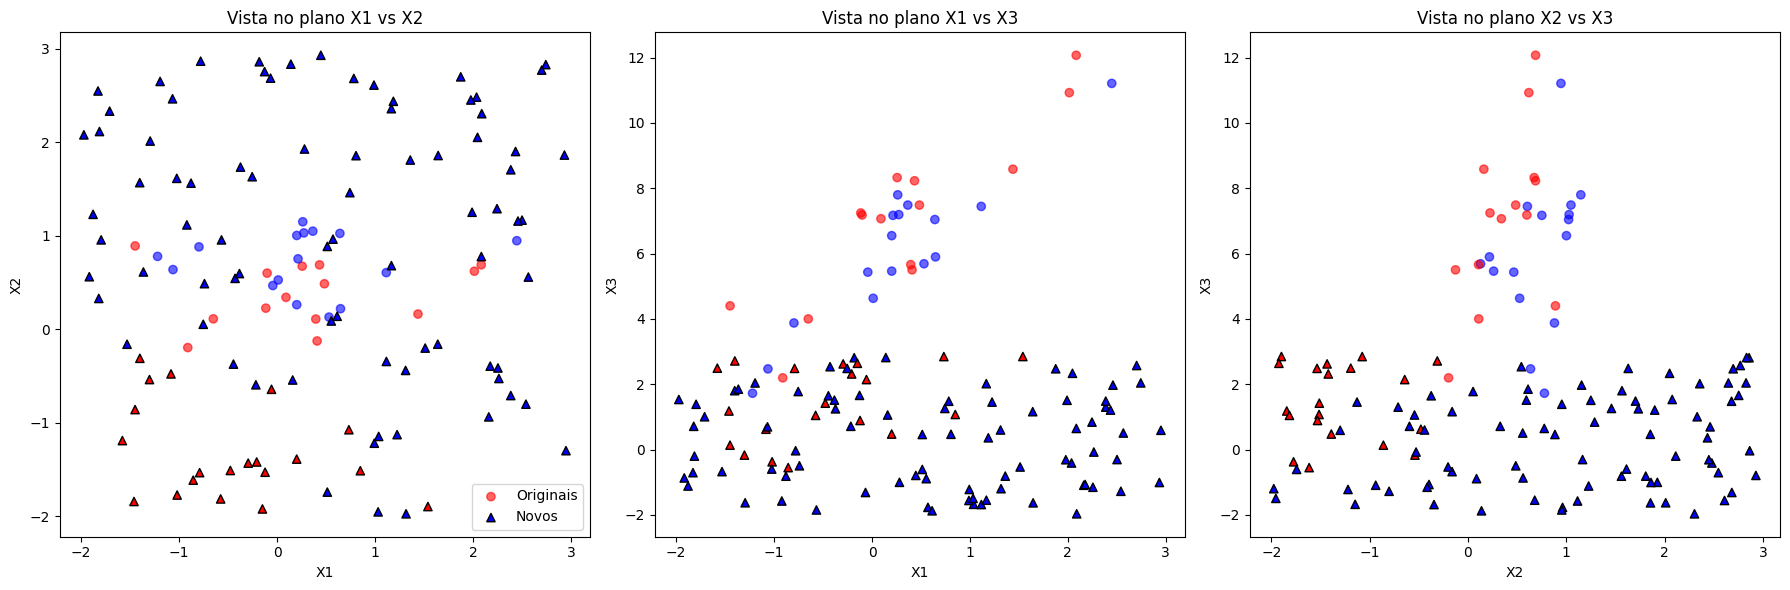

In [6]:
import matplotlib.pyplot as plt

# Dados originais
x_orig = np.array(df[['X1', 'X2', 'X3']])
d_orig = np.array(df['d'])
color_map = {1: 'blue', -1: 'red'}
colors_orig = [color_map[val] for val in d_orig]

# Novos dados
np.random.seed(42)
x_new = np.random.uniform(low=-2, high=3, size=(100, 3))
u_new = w @ x_new.T + w0
d_new = activation(u_new).flatten()
colors_new = [color_map[val] for val in d_new]

# Criar subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# View 1: X1 vs X2
axs[0].scatter(x_orig[:, 0], x_orig[:, 1], c=colors_orig, marker='o', label='Originais', alpha=0.6)
axs[0].scatter(x_new[:, 0], x_new[:, 1], c=colors_new, marker='^', edgecolors='k', label='Novos')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')
axs[0].set_title('Vista no plano X1 vs X2')
axs[0].legend()

# View 2: X1 vs X3
axs[1].scatter(x_orig[:, 0], x_orig[:, 2], c=colors_orig, marker='o', alpha=0.6)
axs[1].scatter(x_new[:, 0], x_new[:, 2], c=colors_new, marker='^', edgecolors='k')
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X3')
axs[1].set_title('Vista no plano X1 vs X3')

# View 3: X2 vs X3
axs[2].scatter(x_orig[:, 1], x_orig[:, 2], c=colors_orig, marker='o', alpha=0.6)
axs[2].scatter(x_new[:, 1], x_new[:, 2], c=colors_new, marker='^', edgecolors='k')
axs[2].set_xlabel('X2')
axs[2].set_ylabel('X3')
axs[2].set_title('Vista no plano X2 vs X3')

plt.tight_layout()
plt.show()


### Implementation comparision using "error" variable

In [7]:
w = np.array([[0.4117752 , 0.26449883, 0.84891831]])
w0 = -1
learn = 0.01
epoch = range(10000)
for i in epoch:
    u = w @ x.T + w0
    y = activation(u)
    error = d - y
    if (error != 0).any():
        w += learn * error @ x
        w0 += learn * error.sum()
    else:
        print(f"Converged after {i} epochs")
        print("Final weights:", w)
        print("Final bias:", w0)
        break

Converged after 1565 epochs
Final weights: [[ 8.7514272  14.20589483 -4.13838569]]
Final bias: 17.79999999999994


np.float64(17.79999999999994)